### General Overview of the Real411 Data

In [42]:
import pandas as pd
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
filtered_data = pd.read_csv("filtered_data.csv")
target_source= filtered_data["source"]
target_source.value_counts()

source
Twitter/X        227
WhatsApp          25
Other             20
Facebook          12
Other Website      9
Youtube            4
Instagram          3
Radio / TV         2
Name: count, dtype: int64

C:\Users\g21m3012\AppData\Local\Temp\ipykernel_20588\2314493522.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


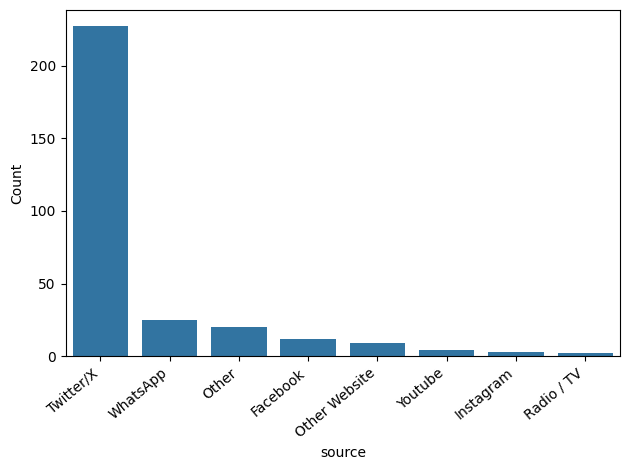

In [44]:
source_count = target_source.value_counts().to_frame(name="Count")

ax = sns.barplot(source_count, x="source", y="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Analyzing the emotional and general sentiment of the Twitter data gathered by Real411

In [7]:
nlp = spacy.load("en_core_web_sm")


In [8]:
# getting the data 
df = pd.read_csv("clean_twitter.csv")

# getting all the media files and converting them into one big string
media_text = df["media"].str.cat(sep='\n')
media_text

'Ntebo Mokobo NEW @MokoboNtebo The MK Party Gauteng Youth Leader Bonginkosi Khanyile has reiterated his stance that there will be violence if the MK Party is removed from the ballot #sabcnews hany IEF\nPearl Mashabai ActionSA @okaMashaba Meet the employed youth of South Africa. People who are not affected by loadshedding. They get discounted fuel, and their trolley of grocery is their areas. Roads are well maintained. #ANCManifestoLaunch Dr Mike Mikia Ramothwala @MikeRamothwala . Feb 24 The ANCYL of President @Collen_Malatji3 and SG @Mntuwoxolo #Mayihlome #ANCManifestoLaunch\nDone news24.com AA City Press Sign in Subscribe Add location Workforce Staffing Temporary Staffing Open Solutions COLUMNISTS TRENDING SPORT MK Party could rule KZN as it enjoys mounting support in the province, threatening ANC 10 Mar Dawie Boonzaaier City Press Comments Gift article Home Search Discover Bookmarks Profile\nDEPARTMENT Dudu Zuma-Sambudla Follow @DZumaSambudla MK Don\'t Tell DA ONTO ikTok thembinkosim

Nouns: 3446 Verbs : 1414


<Axes: xlabel='count', ylabel='type of speach'>

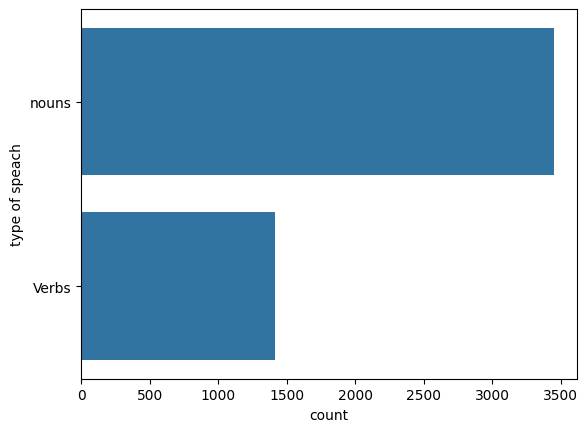

In [38]:
doc = nlp(media_text)

all_nouns = [chunk.text for chunk in doc.noun_chunks]
all_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
types_of_speach = ["nouns", "Verbs"]

print(f"Nouns: {len(all_nouns)} Verbs : {len(all_verbs)}")


speach = pd.DataFrame(zip(types_of_speach, [len(all_nouns), len(all_verbs)]), columns=["type of speach", "count"])
sns.barplot(speach, x="count", y="type of speach")

#### Checking the sentiment of the twitter Data


In [32]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp_sent = spacy.load('en_core_web_sm')
nlp_sent.add_pipe("spacytextblob")


def get_sentiment_list(data):
    sentiment = []
    sentiment_label =""
    for i in data:
        sentiment_polarity = nlp_sent(i)._.blob.polarity 
        if sentiment_polarity > 0:
            sentiment_label = "Positive"
        elif sentiment_polarity < 0 :
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        sentiment.append(sentiment_label)
    return sentiment


['Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral'

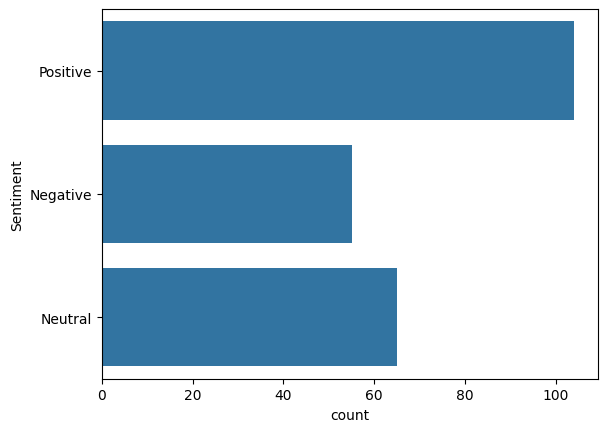

In [39]:
media_list =  media_text.split("\n")

sentiment_list = get_sentiment_list(media_list)

sentFilter = lambda x: [i for i in sentiment_list if i == x]
postive = len(list(sentFilter("Positive")))
negative = len(list(sentFilter("Negative")))
neutral = len(list(sentFilter("Neutral")))

sentDataFrame = pd.DataFrame(zip([postive, neutral, negative], ["Positive", "Negative", "Neutral"]), columns=["count", "Sentiment"])
sns.barplot(sentDataFrame, x="count", y="Sentiment")